In [ ]:
### blood methylation download wrangle 

# - genome build 
#     - GrCh38
# - lab method:  
#     - WG bisulfite seqeuncing --> turns cytosines into uracil but not methylated cytosines. then WGS to see where there are still Cs 
#     - read more : https://www.encodeproject.org/documents/964e2676-d0be-4b5d-aeec-f4f02310b221/@@download/attachment/WGBS%20pipeline%20overview.pdf
# - file format & head: 
#     - OG: bigbed format (type of condesned binary) 
# - what the data represents: 
#     - Description of bedMethyl file: The bedMethyl file is a bed9+2 file containing the number of reads and the percent methylation. Each column represents the following: 
#         1. Reference chromosome or scaffold 
#         2. Start position in chromosome 
#         3. End position in chromosome 
#         4. Name of item 
#         5. Score from 0-1000. Capped number of reads 
#         6. Strandedness, plus (+), minus (-), or unknown (.) 
#         7. Start of where display should be thick (start codon) 
#         8. End of where display should be thick (stop codon) 
#         9. Color value (RGB) 
#         10. Coverage, or number of reads 
#         11. Percentage of reads that show methylation at this position in the genome 


#wget 
wget https://www.encodeproject.org/files/$2/@@download/$2.bigBed -P data/$1/track_data/methylation/ -o data/$1/track_data/methylation/wget_output_CHG.txt
wget https://www.encodeproject.org/files/$3/@@download/$3.bigBed -P data/$1/track_data/methylation/ -o data/$1/track_data/methylation/wget_output_CHH.txt
wget https://www.encodeproject.org/files/$4/@@download/$4.bigBed -P data/$1/track_data/methylation/ -o data/$1/track_data/methylation/wget_output_CpG.txt

#convert to bed 
echo $1 "converting to bed" 
data/applications/UCSC_genomeBrowser_Blat/bigBedToBed data/$1/track_data/methylation/$2.bigBed data/$1/track_data/methylation/methylation_CHG_hg38.bed
data/applications/UCSC_genomeBrowser_Blat/bigBedToBed data/$1/track_data/methylation/$3.bigBed data/$1/track_data/methylation/methylation_CHH_hg38.bed
data/applications/UCSC_genomeBrowser_Blat/bigBedToBed data/$1/track_data/methylation/$4.bigBed data/$1/track_data/methylation/methylation_CpG_hg38.bed
rm data/$1/track_data/methylation/$2.bigBed
rm data/$1/track_data/methylation/$3.bigBed
rm data/$1/track_data/methylation/$4.bigBed

#prepare for liftover 
awk '{print $1"\t"$2"\t"$3"\t"$4"|"$5"|"$6"|"$7"|"$8"|"$9"|"$10"|"$11"|"$12"|"$13"|"$14}' data/$1/track_data/methylation/methylation_CHG_hg38.bed > data/$1/track_data/methylation/methylation_CHG_hg38_preppedLiftover.bed
awk '{print $1"\t"$2"\t"$3"\t"$4"|"$5"|"$6"|"$7"|"$8"|"$9"|"$10"|"$11"|"$12"|"$13"|"$14}' data/$1/track_data/methylation/methylation_CHH_hg38.bed > data/$1/track_data/methylation/methylation_CHH_hg38_preppedLiftover.bed
awk '{print $1"\t"$2"\t"$3"\t"$4"|"$5"|"$6"|"$7"|"$8"|"$9"|"$10"|"$11"|"$12"|"$13"|"$14}' data/$1/track_data/methylation/methylation_CpG_hg38.bed > data/$1/track_data/methylation/methylation_CpG_hg38_preppedLiftover.bed
rm data/$1/track_data/methylation/methylation_CHG_hg38.bed
rm data/$1/track_data/methylation/methylation_CHH_hg38.bed
rm data/$1/track_data/methylation/methylation_CpG_hg38.bed

# #liftvoer hg38-->19 
echo $1 "lifting over hg38-->hg19"
data/applications/UCSC_genomeBrowser_Blat/liftOver data/$1/track_data/methylation/methylation_CHG_hg38_preppedLiftover.bed analysis/modules/download_encode/hg38ToHg19.over.chain.gz data/$1/track_data/methylation/methylation_CHG_hg19.bed  data/$1/track_data/methylation/methylation_CHG_unliftgedhg38.bed
data/applications/UCSC_genomeBrowser_Blat/liftOver data/$1/track_data/methylation/methylation_CHH_hg38_preppedLiftover.bed analysis/modules/download_encode/hg38ToHg19.over.chain.gz data/$1/track_data/methylation/methylation_CHH_hg19.bed  data/$1/track_data/methylation/methylation_CHH_unliftgedhg38.bed
data/applications/UCSC_genomeBrowser_Blat/liftOver data/$1/track_data/methylation/methylation_CpG_hg38_preppedLiftover.bed analysis/modules/download_encode/hg38ToHg19.over.chain.gz data/$1/track_data/methylation/methylation_CpG_hg19.bed  data/$1/track_data/methylation/methylation_CpG_unliftgedhg38.bed
rm data/$1/track_data/methylation/methylation_CHG_hg38_preppedLiftover.bed 
rm data/$1/track_data/methylation/methylation_CHH_hg38_preppedLiftover.bed
rm data/$1/track_data/methylation/methylation_CpG_hg38_preppedLiftover.bed

# #liftvoer hg19-->18 
echo $1 "lifting over hg19-->hg18"
data/applications/UCSC_genomeBrowser_Blat/liftOver data/$1/track_data/methylation/methylation_CHG_hg19.bed analysis/modules/download_encode/hg19ToHg18.over.chain.gz data/$1/track_data/methylation/methylation_CHG_hg18.bed  data/$1/track_data/methylation/methylation_CHG_unliftgedhg19.bed
data/applications/UCSC_genomeBrowser_Blat/liftOver data/$1/track_data/methylation/methylation_CHH_hg19.bed analysis/modules/download_encode/hg19ToHg18.over.chain.gz data/$1/track_data/methylation/methylation_CHH_hg18.bed  data/$1/track_data/methylation/methylation_CHH_unliftgedhg19.bed
data/applications/UCSC_genomeBrowser_Blat/liftOver data/$1/track_data/methylation/methylation_CpG_hg19.bed analysis/modules/download_encode/hg19ToHg18.over.chain.gz data/$1/track_data/methylation/methylation_CpG_hg18.bed  data/$1/track_data/methylation/methylation_CpG_unliftgedhg19.bed
rm data/$1/track_data/methylation/methylation_CHG_hg19.bed 
rm data/$1/track_data/methylation/methylation_CHH_hg19.bed
rm data/$1/track_data/methylation/methylation_CpG_hg19.bed

#bcombine and sort 
echo $1 "combining "
cat data/$1/track_data/methylation/methylation_CHG_hg18.bed > data/$1/track_data/methylation/methylation.bed 
cat data/$1/track_data/methylation/methylation_CHH_hg18.bed >> data/$1/track_data/methylation/methylation.bed 
cat data/$1/track_data/methylation/methylation_CpG_hg18.bed >> data/$1/track_data/methylation/methylation.bed 
rm data/$1/track_data/methylation/methylation_CHG_hg18.bed 
rm data/$1/track_data/methylation/methylation_CHH_hg18.bed 
rm data/$1/track_data/methylation/methylation_CpG_hg18.bed 

echo $1 "sorting"
sort -k1,1V -k2,2n -o data/$1/track_data/methylation/methylation.bed data/$1/track_data/methylation/methylation.bed 
#the sort resulted in "chrom bloacks not continuous" . apparently a probablem with sorting the chrom name. can add -V (-k1,1V) to enforce good sort 

#tabix 
echo $1 "tabixing"
bgzip data/$1/track_data/methylation/methylation.bed
tabix -s 1 -b 2 -e 3 data/$1/track_data/methylation/methylation.bed.gz


# testing the actual coverage 

In [20]:
%%bash 
cd ../../../data/blood/track_data/methylation/
wget https://www.encodeproject.org/files/ENCFF133QNK/@@download/ENCFF133QNK.bam 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [24]:
import pysam
samfile = pysam.AlignmentFile("../../../data/blood/track_data/methylation/ENCFF133QNK.bam", "rb")

In [23]:
%%bash 
cd ../../../data/blood/track_data/methylation/
samtools index ENCFF133QNK.bam

In [31]:
samfile_len = 0
for x in (samfile.fetch("chr1", 	948425, 	948426)): 
    samfile_len+=1

In [95]:
samfile_len

62

In [33]:
#created in the linear model nbotebook 
c_trips_df = open("../../../data/blood/track_data/methylation/predDf_ctrips.csv").readlines()

In [35]:
(c_trips_df)[0]

'"","Chromosome","site","triplet","methylation_precent.0","methylation_coverage.0"\n'

In [72]:
samfile_lens = []
coverages = []
for i,line in enumerate(c_trips_df[1:]):
    line = line.replace("\"","")
    line=line.replace("\n","")
    c_split = line.split(",")
    chrom = c_split[1]
    site=int(c_split[2])
    triplet = c_split[3]
    if c_split[4] in ["no_percent_data",'infsuff_coverage'] :
        continue
    else: 
        percent = float(c_split[4])
        coverage = float(c_split[5])
        samfile_len = 0
        for x in (samfile.fetch(chrom, site,site+1)): 
            samfile_len+=1
        samfile_lens.append(samfile_len)
        coverages.append(coverage)
#     if i == 13: 
#         break 

In [73]:
assert(len(coverages)==len(samfile_lens))

Text(0.5, 1.0, 'bamfile coverage histogram')

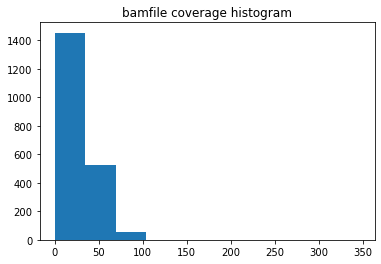

In [79]:
import matplotlib.pyplot as plt 
plt.hist(samfile_lens)
plt.title("bamfile coverage histogram")

Text(0.5, 1.0, 'coverage after processing histogram')

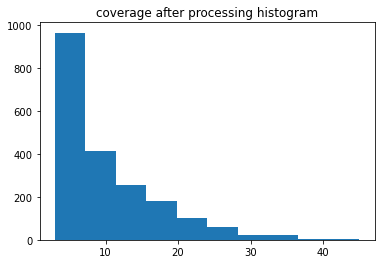

In [80]:
plt.hist(coverages)
plt.title("coverage after processing histogram")

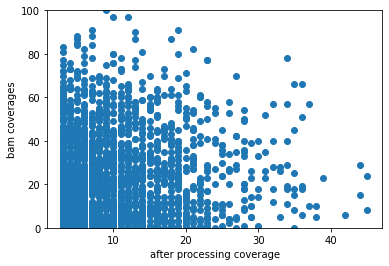

In [94]:
plt.scatter(coverages,samfile_lens)
plt.xlabel("after processing coverage")
plt.ylabel("bam coverages")
plt.ylim([0, 100])
# plt.vlines(10,ymin=3,ymax=10,color="black")
# plt.vlines(30,ymin=3,ymax=30,color="black")
# plt.vlines(40,ymin=3,ymax=40,color="black")
# plt.vlines(20,ymin=3,ymax=20,color="black")
# plt.hlines(10,xmin=3,xmax=10,color="black")
# plt.hlines(20,xmin=3,xmax=20,color="black")
# plt.hlines(30,xmin=3,xmax=30,color="black")
# plt.hlines(40,xmin=3,xmax=40,color="black")
plt.show()

In [ ]:
c_split

In [42]:
samfile_len = 0
for x in (samfile.fetch(chrom, site,site+1)): 
    samfile_len+=1

In [43]:
samfile_len

9

# getting vaerage coverage 

In [28]:
!zcat ../../../data/blood/track_data/methylation/methylation.bed.gz | awk  -F'[\t|]' '{print $10}' > blood_ncoverage.txt


gzip: ../../../data/blood/track_data/methylation/methylation.bed.gz: decompression OK, trailing garbage ignored


In [11]:
!zcat ../../../data/blood/track_data/methylation/methylation.bed.gz | awk  -F'[\t|]' '{print $0}' | head 

chr1	469	470	"0"|3|-|10469|10470|255,155,0|3|66|CG|CG|3
chr1	471	472	"0"|3|-|10471|10472|155,255,0|3|33|CG|CG|3
chr1	472	473	"0"|2|-|10472|10473|0,255,0|2|0|CCG|CCG|1
chr1	481	482	"0"|2|-|10481|10482|0,255,0|2|0|CTG|CTG|1
chr1	484	485	"0"|1|-|10484|10485|255,0,0|1|100|CG|CG|2
chr1	485	486	"0"|1|-|10485|10486|0,255,0|1|0|CCG|CCG|1
chr1	489	490	"0"|2|-|10489|10490|255,0,0|2|100|CG|CG|4
chr1	493	494	"0"|1|-|10493|10494|255,0,0|1|100|CG|CG|4
chr1	494	495	"0"|1|+|10494|10495|0,255,0|1|0|CCC|CCC|5
chr1	495	496	"0"|1|+|10495|10496|0,255,0|1|0|CCG|CCG|5
awk: cmd. line:1: (FILENAME=- FNR=778) fatal: print to "standard output" failed (Broken pipe)

gzip: stdout: Broken pipe


In [16]:
!zcat ../../../data/blood/track_data/methylation/methylation.bed.gz | awk  -F'[\t|]' '{print $4}' | head -n 1000000 | sort | uniq -c 

awk: cmd. line:1: (FILENAME=- FNR=1001473) fatal: print to "standard output" failed (Broken pipe)

gzip: stdout: Broken pipe
1000000 "0"


In [19]:
!zcat ../../../data/blood/track_data/methylation/methylation.bed.gz | awk  -F'[\t|]' '{print $5"\t"$10}' | head -n 1000000 | sort | uniq -c 

awk: cmd. line:1: (FILENAME=- FNR=1001106) fatal: print to "standard output" failed (Broken pipe)

gzip: stdout: Broken pipe
  46296 10	10
      2 101	101
      4 102	102
      3 103	103
      2 104	104
      2 105	105
      3 106	106
      5 107	107
      4 108	108
  92297 1	1
  44962 11	11
      1 111	111
      1 112	112
      1 113	113
      4 116	116
      4 117	117
      3 118	118
      1 119	119
      1 120	120
  43070 12	12
      3 122	122
      4 123	123
      5 124	124
      1 125	125
      4 126	126
      3 127	127
      1 128	128
      1 129	129
  40699 13	13
      1 132	132
      2 133	133
      1 134	134
      1 135	135
      2 136	136
      2 138	138
      1 141	141
  38615 14	14
      1 143	143
      2 145	145
      2 146	146
      1 148	148
      1 150	150
  35476 15	15
      3 152	152
      1 153	153
      1 154	154
      2 155	155
      1 157	157
      1 161	161
  32392 16	16
      1 162	162
      1 168	168
      2 169	169
  28465 17	17
      2 176	176
      1 177	177

In [15]:
!zcat ../../../data/blood/track_data/methylation/methylation.bed.gz | awk  -F'[\t|]' '{print $10}' | head 

3
3
2
2
1
1
2
1
1
1
awk: cmd. line:1: (FILENAME=- FNR=3899) fatal: print to "standard output" failed (Broken pipe)

gzip: stdout: Broken pipe


In [1]:
import numpy as np 
import random 

In [2]:
test_coverage = open("blood_ncoverage.txt").readlines()

In [3]:
test_coverage = random.sample(test_coverage,1000000)

In [4]:
for i,line in enumerate(test_coverage): 
    test_coverage[i] = int(line.rstrip("\n"))

In [5]:
np.mean(test_coverage)

7.192821

In [6]:
np.median(test_coverage)

5.0

In [7]:
import matplotlib.pyplot as plt

(array([9.99991e+05, 4.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.0000e+00, 4.1270e+02, 8.2440e+02, 1.2361e+03, 1.6478e+03,
        2.0595e+03, 2.4712e+03, 2.8829e+03, 3.2946e+03, 3.7063e+03,
        4.1180e+03]),
 <BarContainer object of 10 artists>)

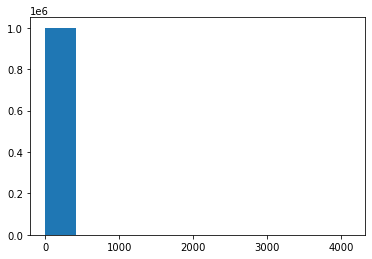

In [8]:
plt.hist(test_coverage)

In [9]:
count_10 = 0
for x in test_coverage: 
    if x >= 10 : 
        count_10 += 1

In [10]:
count_10/len(test_coverage)

0.273879

In [11]:
np.max(test_coverage)

4118

 # chnaging the methylation output for the createdf 

In [2]:
from Bio import AlignIO
import pysam 
import gzip
from numpy.random import choice
import numpy as np 

In [3]:
filename_tmp ="../../../"+"data/global/sequence/chr1.fa.gz"
with gzip.open(filename_tmp, "rt") as handle:
    alignment = (AlignIO.read(handle,"fasta"))

In [8]:
filename = "../../../data/blood/track_data/methylation/methylation.bed.gz"
site = ['chr1', 4129241, 1]
list_of_surrounding_contexts = [1,10]
row = ['chr1', 4129241, 1]
error_log = str()

for distance in list_of_surrounding_contexts: 

    track_output = [record for record in pysam.Tabixfile(filename).fetch(site[0], site[1]-distance, site[1]+1+distance)]
    if track_output: 
        if distance in [0,1]: 
            record_pres = False
            next_door = False
            for record in track_output: 
                if int(record.split("\t")[1]) == site[1]: 
                    record_pres =True
                    num_reads_at_site,percent_methylated = record.split("|")[6:8]
                    row.extend([percent_methylated,num_reads_at_site])
                elif int(record.split("\t")[1]) in [site[1]-1,site[1]+1]: next_door = True
            if not record_pres and next_door==False: #the track_output is empty
                error_log += (str("methylation track output empty "+site[0]+" "+str(site[1])+"\n"))
                print("errorlog")
        else: 
            num_reads_list = []
            percent_methyl_list = []
            for record in track_output:
                num_reads_at_site,percent_methylated = record.split("|")[6:8]
                num_reads_list.append(int(num_reads_at_site))
                percent_methyl_list.append(float(percent_methylated))
        row.extend([np.mean(percent_methyl_list),np.mean(num_reads_list)])
    else: 
        if alignment[0][site[1]].upper() == "C": 
            error_log += (str("c site doesnt have data "+site[0]+" "+str(site[1])+"\n"))
        row.extend(["no_percent_data","no_coverage_data"])
    print(distance, row)

1 ['chr1', 4129241, 1, 'no_percent_data', 'no_coverage_data']
10 ['chr1', 4129241, 1, 'no_percent_data', 'no_coverage_data', 0.0, 25.0]


[W::hts_idx_load3] The index file is older than the data file: ../../../data/blood/track_data/methylation/methylation.bed.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: ../../../data/blood/track_data/methylation/methylation.bed.gz.tbi


In [9]:
track_output

['chr1\t4129232\t4129233\t"0"|25|-|4169312|4169313|0,255,0|25|0|CTG|CTG|2']

In [7]:
test_string = str()
test_string += str("c site doesnt have data ",site[0]," ",str(site[1]),"\n")

TypeError: can only concatenate str (not "tuple") to str

In [41]:
percent_methyl_list,num_reads_list

([0.0], [25])

In [42]:
num_reads_at_site

'25'

In [28]:
[record for record in pysam.Tabixfile(filename).fetch(site[0], site[1]-10, site[1]+1+10)]

[W::hts_idx_load3] The index file is older than the data file: ../../../data/blood/track_data/methylation/methylation.bed.gz.tbi


['chr1\t4129232\t4129233\t"0"|25|-|4169312|4169313|0,255,0|25|0|CTG|CTG|2']